# Dungeon Level Statistics

Analysis of fitness function for different level MAP-Elites runs.

In [28]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Base path for levels
LEVELS_PATH = "levels"

def load_fitness_heatmap(folder_name):
    """Load fitness values from all bucket files in a folder into a 10x10 grid."""
    folder_path = os.path.join(LEVELS_PATH, folder_name)
    fitness_grid = np.zeros((10, 10))
    
    for x in range(10):
        for y in range(10):
            file_name = f"x_{x:02d}_y_{y:02d}.json"
            file_path = os.path.join(folder_path, file_name)
            
            if os.path.exists(file_path):
                with open(file_path, 'r') as f:
                    data = json.load(f)
                    fitness_grid[y, x] = data.get('fitness', 0)
            else:
                fitness_grid[y, x] = np.nan
    
    return fitness_grid

def plot_fitness_heatmap(folder_name, ax=None):
    """Create a heatmap of fitness values for a given folder."""
    fitness_grid = load_fitness_heatmap(folder_name)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    
    sns.heatmap(
        fitness_grid,
        annot=True,
        fmt='.2f',
        cmap='YlOrRd',
        ax=ax,
        vmin=0,
        vmax=1,
        cbar_kws={'label': 'Fitness'},
        xticklabels=[f'{i}' for i in range(10)],
        yticklabels=[f'{i}' for i in range(10)]
    )
    
    ax.set_title(f'Fitness Heatmap: {folder_name}', fontsize=14, fontweight='bold')
    ax.set_xlabel('X (Difficulty bucket)', fontsize=12)
    ax.set_ylabel('Y (Reward bucket)', fontsize=12)
    
    return fitness_grid

## Fitness Heatmaps by Room Size

Each heatmap shows the fitness value for every bucket in the MAP-Elites archive.
- **X-axis**: Difficulty bucket (0-9)
- **Y-axis**: Reward bucket (0-9)
- **Color intensity**: Fitness value (0 = low quality, 1 = high quality)

In [29]:
level_folders = [f for f in os.listdir(LEVELS_PATH) 
                 if os.path.isdir(os.path.join(LEVELS_PATH, f))]
level_folders = sorted(level_folders)

print(f"Found {len(level_folders)} level folders:")
for folder in level_folders:
    print(f"  - {folder}")

Found 3 level folders:
  - Large_rooms_8x6
  - Medium_rooms_5x3
  - Small_rooms_2x2


Stats for Large_rooms_8x6:
Mean: 0.643, Std: 0.035, Min: 0.456, Max: 0.699
Stats for Medium_rooms_5x3:
Mean: 0.474, Std: 0.038, Min: 0.342, Max: 0.564
Stats for Small_rooms_2x2:
Mean: 0.255, Std: 0.040, Min: 0.161, Max: 0.306


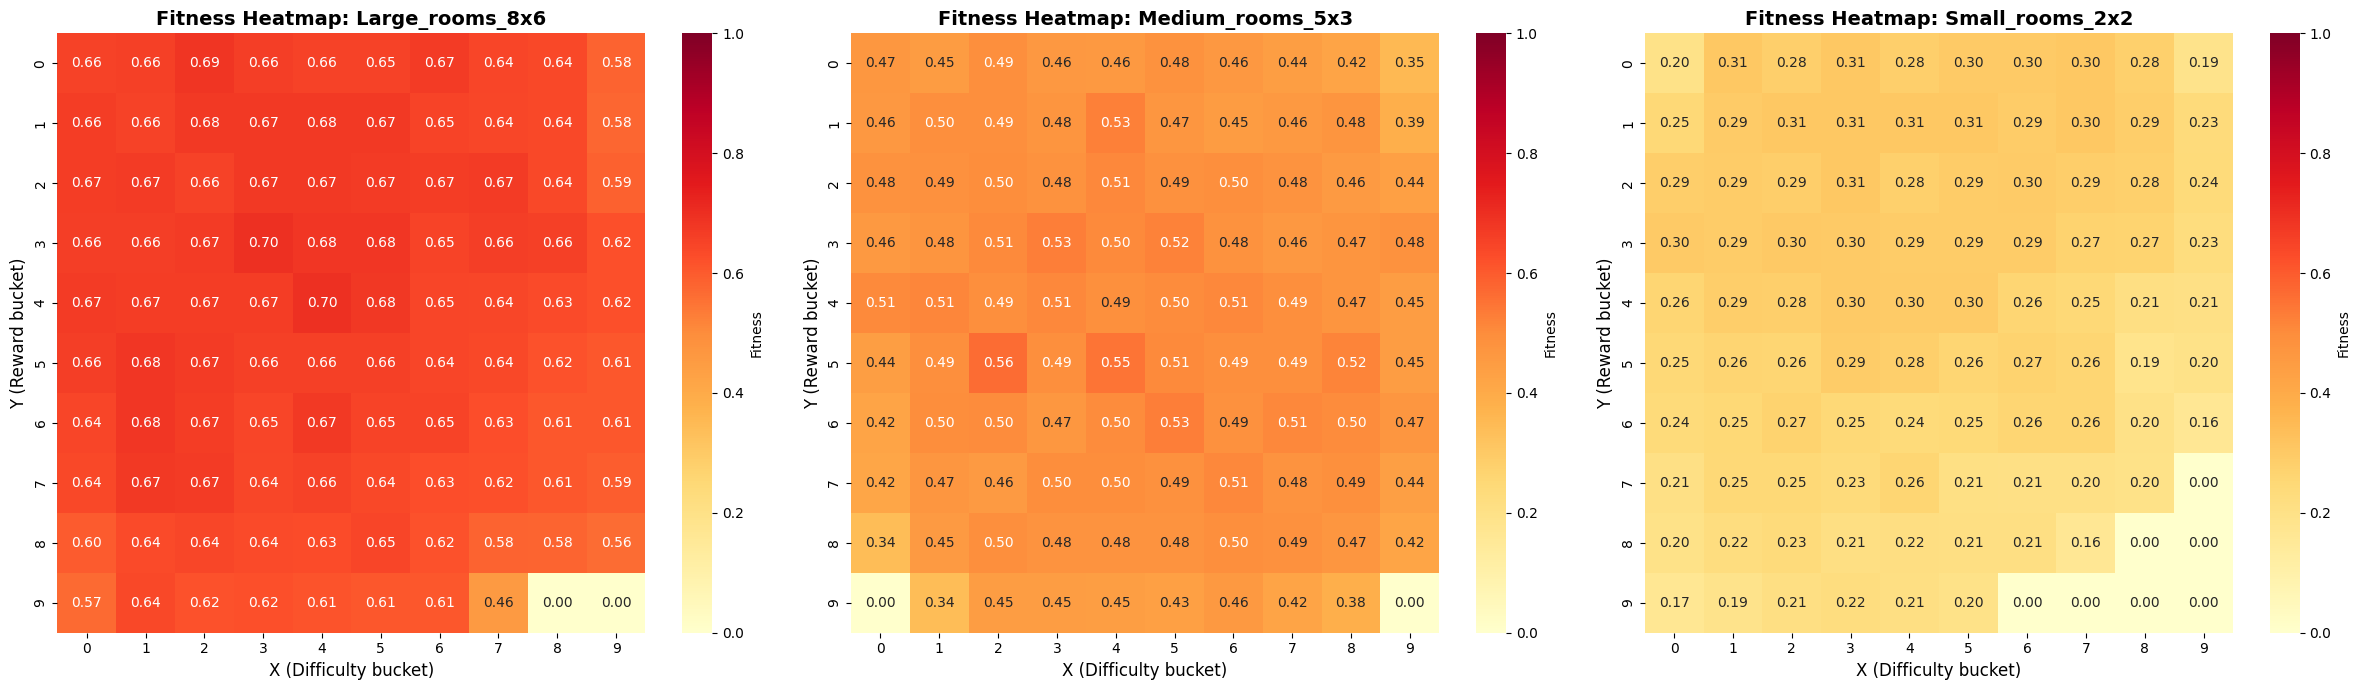

In [38]:
fig, axes = plt.subplots(1, len(level_folders), figsize=(8 * len(level_folders), 7))

if len(level_folders) == 1:
    axes = [axes]

fitness_data = {}

for ax, folder in zip(axes, level_folders):
    fitness_grid = plot_fitness_heatmap(folder, ax)
    fitness_data[folder] = fitness_grid
    
    valid_fitness = fitness_grid[fitness_grid > 0]
    stats_text = f"Mean: {np.mean(valid_fitness):.3f}\nStd: {np.std(valid_fitness):.3f}\nMin: {np.min(valid_fitness):.3f}\nMax: {np.max(valid_fitness):.3f}"
    print(f"Stats for {folder}:\nMean: {np.mean(valid_fitness):.3f}, Std: {np.std(valid_fitness):.3f}, Min: {np.min(valid_fitness):.3f}, Max: {np.max(valid_fitness):.3f}")

plt.tight_layout()
plt.show()

## Summary Statistics

Comparison of fitness statistics across all room size configurations.

In [ ]:
import pandas as pd

summary_stats = []
for folder, grid in fitness_data.items():
    valid_fitness = grid[grid > 0]
    all_fitness = grid.flatten()
    
    summary_stats.append({
        'Room Size': folder,
        'Total Buckets': 100,
        'Valid Buckets (fitness>0)': np.sum(grid > 0),
        'Coverage (%)': np.sum(grid > 0),
        'Mean Fitness': np.mean(valid_fitness),
        'Std Fitness': np.std(valid_fitness),
        'Min Fitness': np.min(valid_fitness),
        'Max Fitness': np.max(valid_fitness),
        'Median Fitness': np.median(valid_fitness)
    })

summary_df = pd.DataFrame(summary_stats)
summary_df.set_index('Room Size', inplace=True)
summary_df

,Total Buckets,Valid Buckets (fitness>0),Coverage (%),Mean Fitness,Std Fitness,Min Fitness,Max Fitness,Median Fitness
Room Size,,,,,,,,
Large_rooms_8x6,100,98,98,0.643240,0.034793,0.455915,0.698996,0.649079
Medium_rooms_5x3,100,98,98,0.474171,0.038235,0.342184,0.564151,0.480974
Small_rooms_2x2,100,93,93,0.255407,0.040322,0.161005,0.305794,0.260162


## Node Count Analysis

Analyzing the number of nodes in each dungeon tree to understand structural diversity across buckets.

In [32]:
def load_node_count_grid(folder_name):
    """Load node counts from all bucket files in a folder into a 10x10 grid."""
    folder_path = os.path.join(LEVELS_PATH, folder_name)
    node_count_grid = np.zeros((10, 10))
    
    for x in range(10):
        for y in range(10):
            file_name = f"x_{x:02d}_y_{y:02d}.json"
            file_path = os.path.join(folder_path, file_name)
            
            if os.path.exists(file_path):
                with open(file_path, 'r') as f:
                    data = json.load(f)
                    nodes = data.get('nodes', [])
                    node_count_grid[y, x] = len(nodes)
            else:
                node_count_grid[y, x] = np.nan
    
    return node_count_grid

# Load node counts for all folders
node_count_data = {}
for folder in level_folders:
    node_count_data[folder] = load_node_count_grid(folder)

Large_rooms_8x6:
Mean: 19.4
Std: 1.2
Min: 11
Max: 21

Medium_rooms_5x3:
Mean: 30.9
Std: 2.1
Min: 19
Max: 35

Small_rooms_2x2:
Mean: 44.8
Std: 10.4
Min: 6
Max: 55



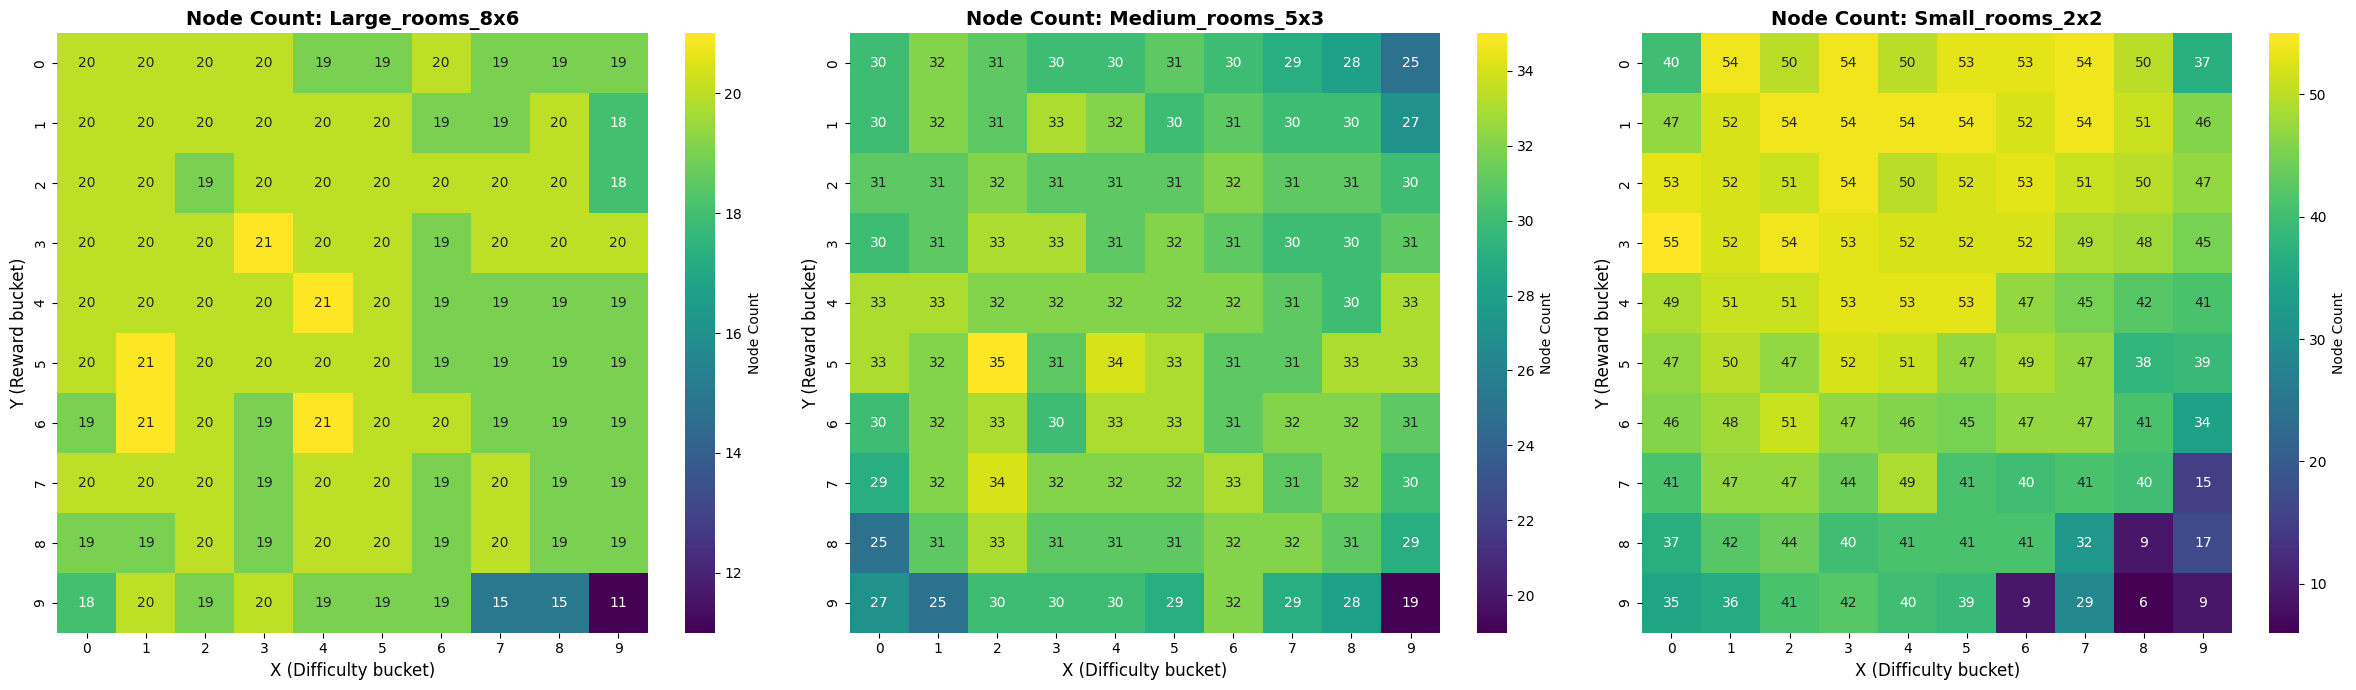

In [33]:
# Node Count Heatmaps
fig, axes = plt.subplots(1, len(level_folders), figsize=(8 * len(level_folders), 7))

if len(level_folders) == 1:
    axes = [axes]

for ax, folder in zip(axes, level_folders):
    grid = node_count_data[folder]
    
    sns.heatmap(
        grid,
        annot=True,
        fmt='.0f',
        cmap='viridis',
        ax=ax,
        cbar_kws={'label': 'Node Count'},
        xticklabels=[f'{i}' for i in range(10)],
        yticklabels=[f'{i}' for i in range(10)]
    )
    
    ax.set_title(f'Node Count: {folder}', fontsize=14, fontweight='bold')
    ax.set_xlabel('X (Difficulty bucket)', fontsize=12)
    ax.set_ylabel('Y (Reward bucket)', fontsize=12)
    
    # Stats
    valid_counts = grid[~np.isnan(grid)]
    stats_text = f"{folder}:\nMean: {np.mean(valid_counts):.1f}\nStd: {np.std(valid_counts):.1f}\nMin: {np.min(valid_counts):.0f}\nMax: {np.max(valid_counts):.0f}"
    print(stats_text)
    print()

plt.tight_layout()
plt.show()


## Diversity Metrics

Multiple ways to measure diversity across buckets:

In [34]:
def load_full_level_data(folder_name):
    """Load complete level data from all bucket files."""
    folder_path = os.path.join(LEVELS_PATH, folder_name)
    data_grid = {}
    
    for x in range(10):
        for y in range(10):
            file_name = f"x_{x:02d}_y_{y:02d}.json"
            file_path = os.path.join(folder_path, file_name)
            
            if os.path.exists(file_path):
                with open(file_path, 'r') as f:
                    data_grid[(x, y)] = json.load(f)
    
    return data_grid

def compute_node_type_distribution(level_data):
    """Compute distribution of node types in a level."""
    nodes = level_data.get('nodes', [])
    type_counts = {}
    for node in nodes:
        node_type = node.get('type', 'Unknown')
        type_counts[node_type] = type_counts.get(node_type, 0) + 1
    return type_counts

# Load full data for diversity analysis
full_data = {}
for folder in level_folders:
    full_data[folder] = load_full_level_data(folder)

In [35]:
# Diversity Analysis: Node Type Entropy (Shannon Entropy)
# Higher entropy = more diverse node types in a level

from math import log2

def compute_entropy(type_counts):
    """Compute Shannon entropy of node type distribution."""
    total = sum(type_counts.values())
    if total == 0:
        return 0
    probs = [count / total for count in type_counts.values()]
    return -sum(p * log2(p) for p in probs if p > 0)

def create_diversity_grids(folder_name, data_dict):
    """Create grids for various diversity metrics."""
    entropy_grid = np.zeros((10, 10))
    unique_types_grid = np.zeros((10, 10))
    edge_count_grid = np.zeros((10, 10))
    
    for x in range(10):
        for y in range(10):
            if (x, y) in data_dict:
                level = data_dict[(x, y)]
                type_dist = compute_node_type_distribution(level)
                
                entropy_grid[y, x] = compute_entropy(type_dist)
                unique_types_grid[y, x] = len(type_dist)
                edge_count_grid[y, x] = len(level.get('edges', []))
            else:
                entropy_grid[y, x] = np.nan
                unique_types_grid[y, x] = np.nan
                edge_count_grid[y, x] = np.nan
    
    return {
        'entropy': entropy_grid,
        'edge_count': edge_count_grid,
        "edge_per_node": edge_count_grid / (node_count_data[folder_name] + 1e-6)
    }

diversity_data = {}
for folder in level_folders:
    diversity_data[folder] = create_diversity_grids(folder, full_data[folder])

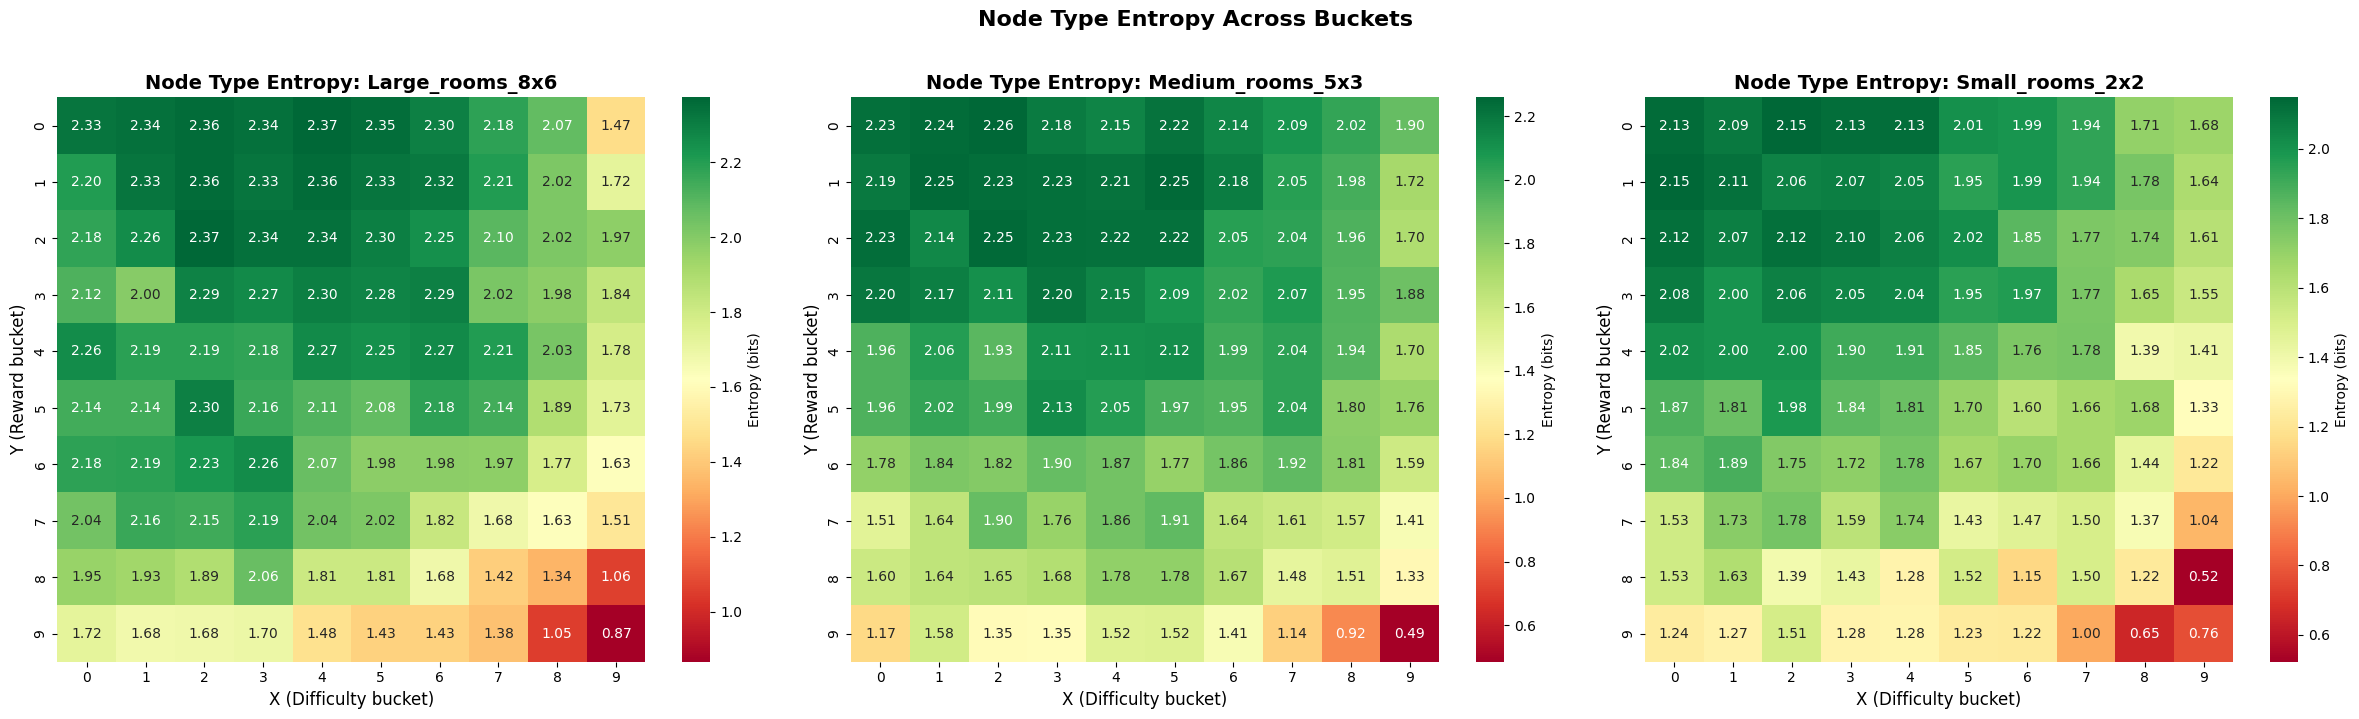

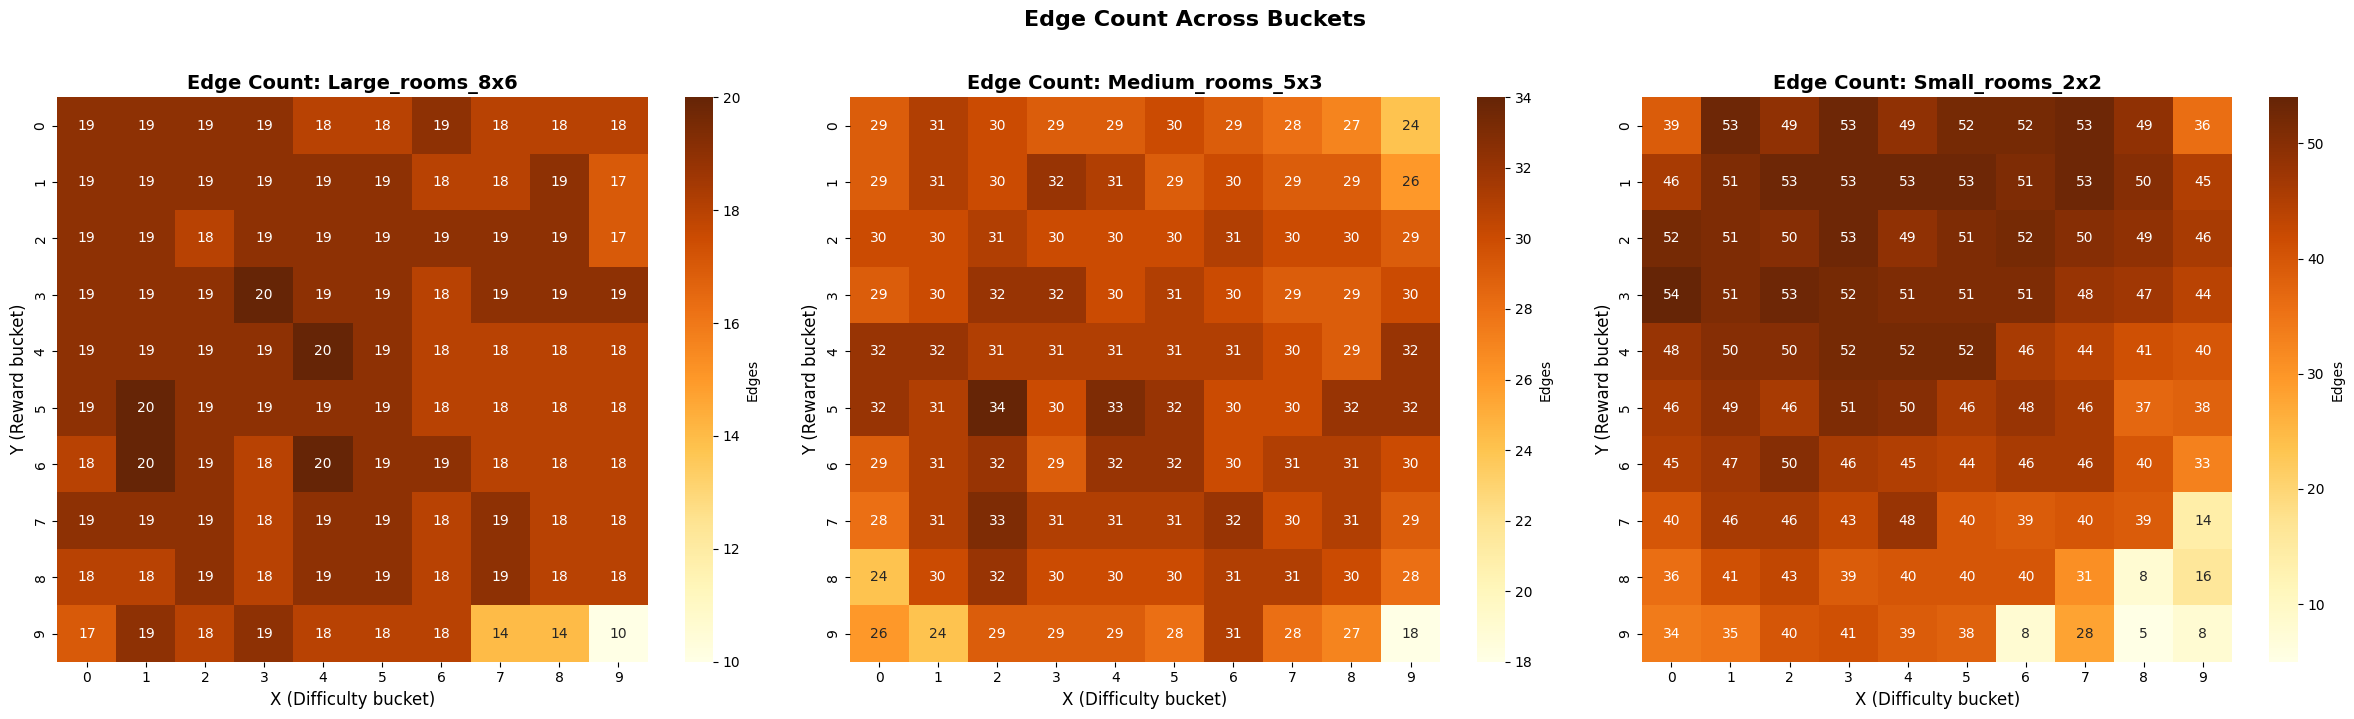

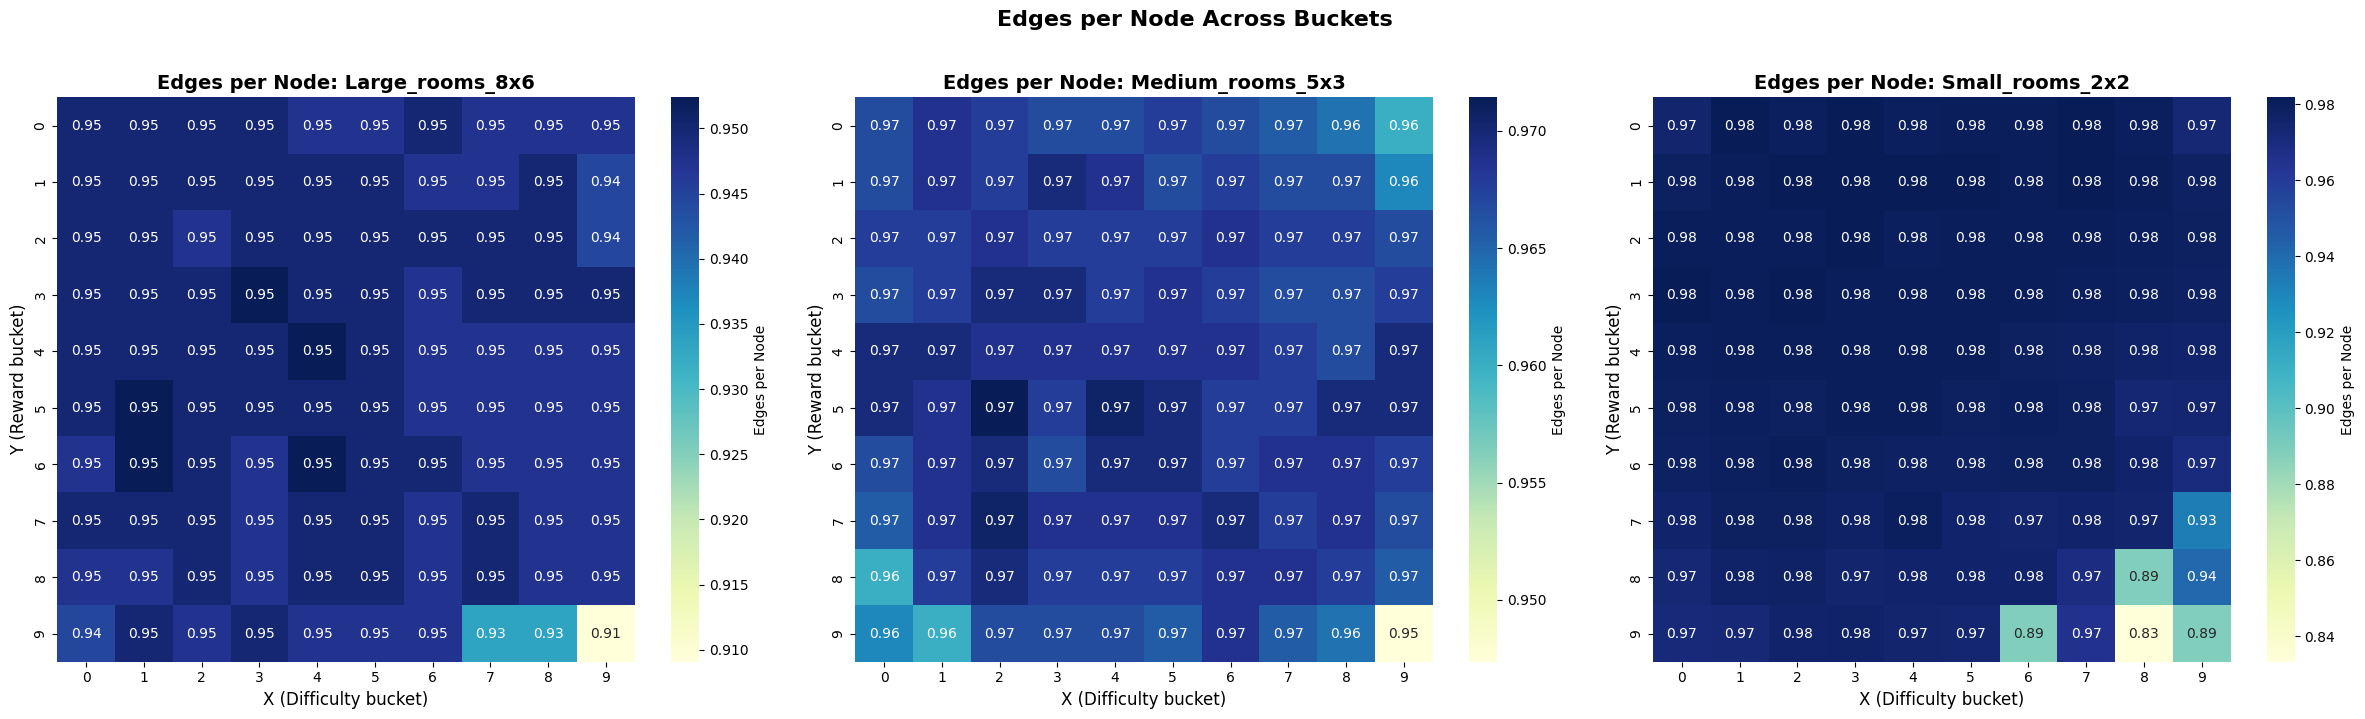

In [36]:

metrics = ['entropy', 'edge_count', "edge_per_node"]
metric_labels = {
    'entropy': ('Node Type Entropy', 'Entropy (bits)', 'RdYlGn'),
    'edge_count': ('Edge Count', 'Edges', 'YlOrBr'),
    'edge_per_node': ('Edges per Node', 'Edges per Node', 'YlGnBu')
}

for metric in metrics:
    fig, axes = plt.subplots(1, len(level_folders), figsize=(8 * len(level_folders), 7))
    
    if len(level_folders) == 1:
        axes = [axes]
    
    label, cbar_label, cmap = metric_labels[metric]
    
    for ax, folder in zip(axes, level_folders):
        grid = diversity_data[folder][metric]
        
        sns.heatmap(
            grid,
            annot=True,
            fmt='.0f' if metric == 'edge_count' else '.2f',
            cmap=cmap,
            ax=ax,
            cbar_kws={'label': cbar_label},
            xticklabels=[f'{i}' for i in range(10)],
            yticklabels=[f'{i}' for i in range(10)]
        )
        
        ax.set_title(f'{label}: {folder}', fontsize=14, fontweight='bold')
        ax.set_xlabel('X (Difficulty bucket)', fontsize=12)
        ax.set_ylabel('Y (Reward bucket)', fontsize=12)
    
    plt.suptitle(f'{label} Across Buckets', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

## Path Length Analysis

Length of the shortest path from Start node to Exit node in each dungeon.

In [40]:
from collections import deque

def compute_path_length(level_data):
    """Compute shortest path length from Start to Exit using BFS."""
    nodes = level_data.get('nodes', [])
    edges = level_data.get('edges', [])
    
    # Find Start and Exit node IDs
    start_id = None
    exit_id = None
    for node in nodes:
        if node.get('type') == 'Start':
            start_id = node.get('id')
        elif node.get('type') == 'Exit':
            exit_id = node.get('id')
    
    if start_id is None or exit_id is None:
        return np.nan
    
    # Build adjacency list (undirected graph)
    adj = {}
    for edge in edges:
        from_id = edge.get('from')
        to_id = edge.get('to')
        if from_id not in adj:
            adj[from_id] = []
        if to_id not in adj:
            adj[to_id] = []
        adj[from_id].append(to_id)
        adj[to_id].append(from_id)
    
    # BFS to find shortest path
    visited = {start_id}
    queue = deque([(start_id, 0)])
    
    while queue:
        current, dist = queue.popleft()
        if current == exit_id:
            return dist
        for neighbor in adj.get(current, []):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, dist + 1))
    
    return np.nan  # No path found

def create_path_length_grid(folder_name, data_dict):
    """Create grid of path lengths from Start to Exit."""
    path_grid = np.zeros((10, 10))
    
    for x in range(10):
        for y in range(10):
            if (x, y) in data_dict:
                path_grid[y, x] = compute_path_length(data_dict[(x, y)])
            else:
                path_grid[y, x] = np.nan
    
    return path_grid

# Compute path lengths for all folders
path_length_data = {}
for folder in level_folders:
    path_length_data[folder] = create_path_length_grid(folder, full_data[folder])

print("Path length grids computed.")

Path length grids computed.


Large_rooms_8x6: Mean: 9.1, Std: 0.8, Min: 6, Max: 11
Medium_rooms_5x3: Mean: 10.1, Std: 2.2, Min: 5, Max: 13
Small_rooms_2x2: Mean: 11.7, Std: 3.3, Min: 4, Max: 15


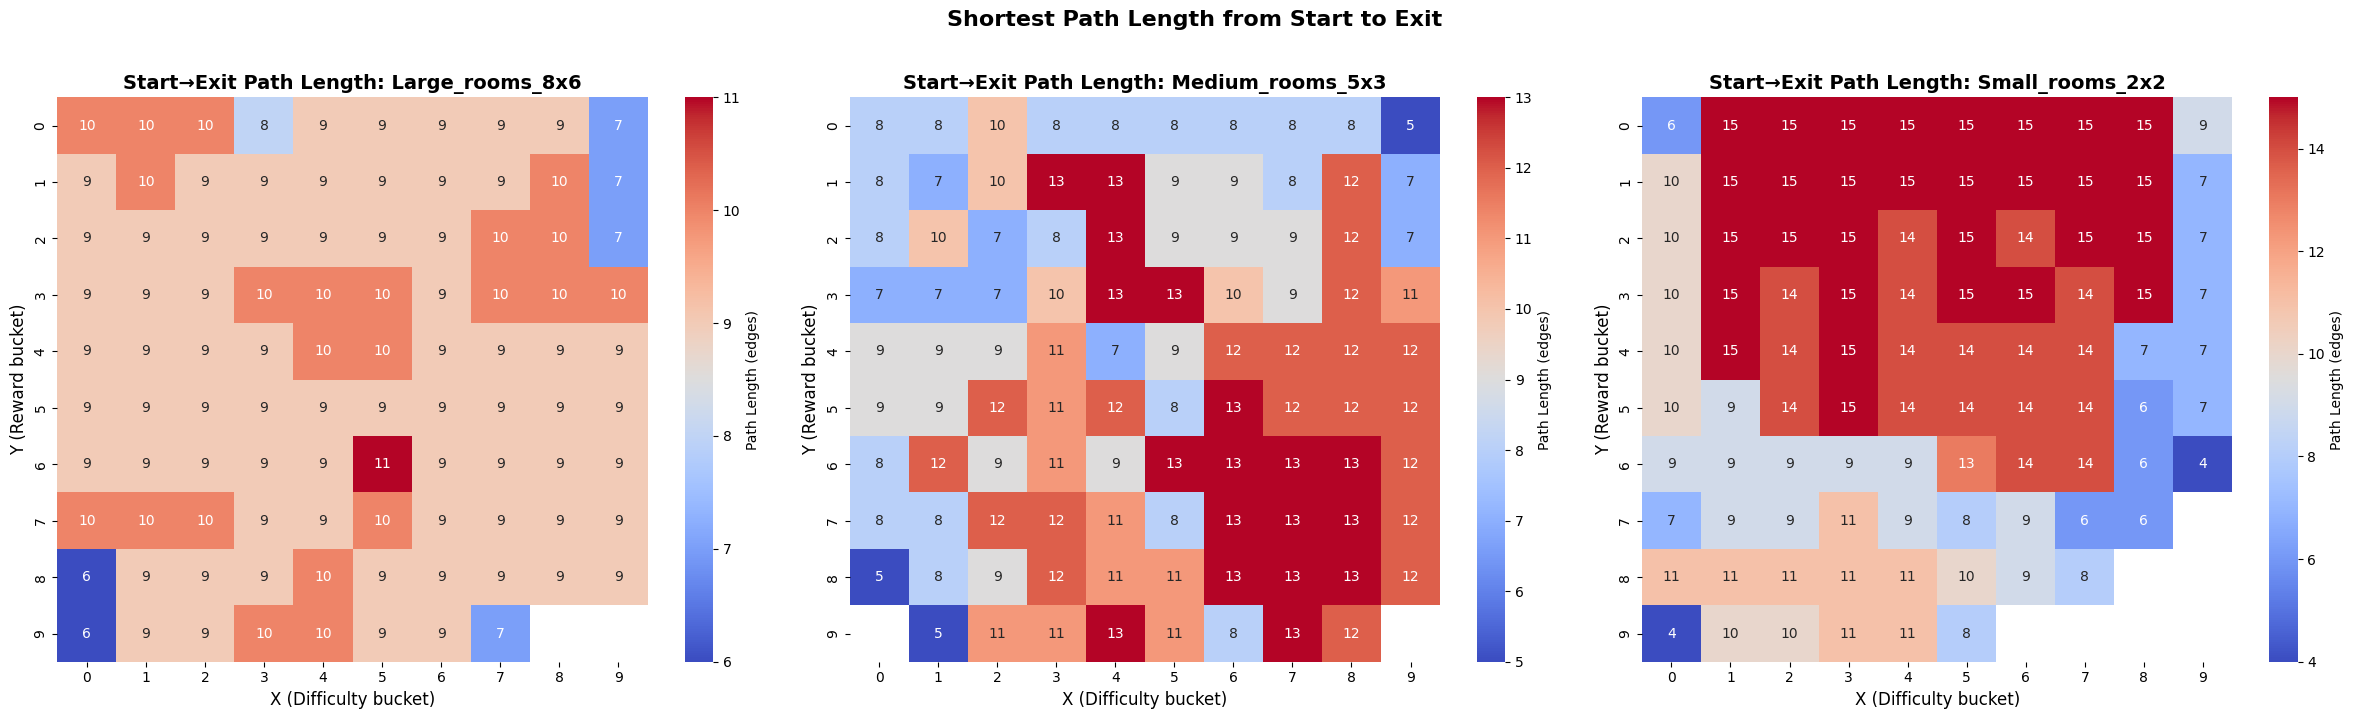

In [41]:
# Path Length Heatmaps
fig, axes = plt.subplots(1, len(level_folders), figsize=(8 * len(level_folders), 7))

if len(level_folders) == 1:
    axes = [axes]

for ax, folder in zip(axes, level_folders):
    grid = path_length_data[folder]
    
    sns.heatmap(
        grid,
        annot=True,
        fmt='.0f',
        cmap='coolwarm',
        ax=ax,
        cbar_kws={'label': 'Path Length (edges)'},
        xticklabels=[f'{i}' for i in range(10)],
        yticklabels=[f'{i}' for i in range(10)]
    )
    
    ax.set_title(f'Start→Exit Path Length: {folder}', fontsize=14, fontweight='bold')
    ax.set_xlabel('X (Difficulty bucket)', fontsize=12)
    ax.set_ylabel('Y (Reward bucket)', fontsize=12)
    
    # Stats
    valid_paths = grid[~np.isnan(grid)]
    stats_text = f"Mean: {np.mean(valid_paths):.1f}\nStd: {np.std(valid_paths):.1f}\nMin: {np.min(valid_paths):.0f}\nMax: {np.max(valid_paths):.0f}"
    print(f"{folder}: {stats_text.replace(chr(10), ', ')}")

plt.suptitle('Shortest Path Length from Start to Exit', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [37]:
# Summary: Diversity comparison across room sizes
diversity_summary = []

for folder in level_folders:
    node_grid = node_count_data[folder]
    ent_grid = diversity_data[folder]['entropy']
    types_grid = diversity_data[folder]['edge_per_node']
    edges_grid = diversity_data[folder]['edge_count']
    
    valid_nodes = node_grid[~np.isnan(node_grid)]
    valid_ent = ent_grid[~np.isnan(ent_grid)]
    valid_types = types_grid[~np.isnan(types_grid)]
    valid_edges = edges_grid[~np.isnan(edges_grid)]
    
    diversity_summary.append({
        'Room Size': folder,
        'Avg Nodes': np.mean(valid_nodes),
        'Std Nodes': np.std(valid_nodes),
        'Node Range': f"{int(np.min(valid_nodes))}-{int(np.max(valid_nodes))}",
        'Avg Entropy': np.mean(valid_ent),
        'Avg Edges': np.mean(valid_edges),
        'Avg edges per Node': np.mean(valid_edges / (valid_nodes + 1e-6))
    })

diversity_df = pd.DataFrame(diversity_summary)
diversity_df.set_index('Room Size', inplace=True)
diversity_df

,Avg Nodes,Std Nodes,Node Range,Avg Entropy,Avg Edges,Avg edges per Node
Room Size,,,,,,
Large_rooms_8x6,19.44,1.235476,11-21,2.011605,18.44,0.948263
Medium_rooms_5x3,30.90,2.137756,19-35,1.877896,29.90,0.967445
Small_rooms_2x2,44.77,10.372902,6-55,1.699872,43.77,0.973348
